In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)


In [17]:
DATASET_PATH = r"C:\Users\anama\Documents\Group_8\Dataset\DERM7PT"

X = pd.read_csv(os.path.join(DATASET_PATH, "meta", "features.csv"))
y_binary = pd.read_csv(os.path.join(DATASET_PATH, "meta", "target_binary.csv"))
y_multiclass = pd.read_csv(os.path.join(DATASET_PATH, "meta", "target_multiclass.csv"))

train_idx = pd.read_csv(os.path.join(DATASET_PATH, "meta", "train_indexes.csv"))["indexes"].tolist()
valid_idx = pd.read_csv(os.path.join(DATASET_PATH, "meta", "valid_indexes.csv"))["indexes"].tolist()
test_idx  = pd.read_csv(os.path.join(DATASET_PATH, "meta", "test_indexes.csv"))["indexes"].tolist()

X_train, X_valid, X_test = X.iloc[train_idx], X.iloc[valid_idx], X.iloc[test_idx]
y_train_bin, y_valid_bin, y_test_bin = y_binary.iloc[train_idx], y_binary.iloc[valid_idx], y_binary.iloc[test_idx]
y_train_multi, y_valid_multi, y_test_multi = y_multiclass.iloc[train_idx], y_multiclass.iloc[valid_idx], y_multiclass.iloc[test_idx]

# Flatten binary targets
y_train_bin = y_train_bin.values.ravel()
y_valid_bin = y_valid_bin.values.ravel()
y_test_bin  = y_test_bin.values.ravel()


In [18]:
def print_metrics(y_true, y_pred, split_name):
    print(f"\n{split_name} Metrics:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred, zero_division=0))

def get_metrics(y_true, y_pred, y_prob=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0)
    }
    metrics["AUC"] = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    return metrics



Test Metrics:
Accuracy : 0.8987341772151899
Precision: 0.7479674796747967
Recall   : 0.9108910891089109
F1 Score : 0.8214285714285714


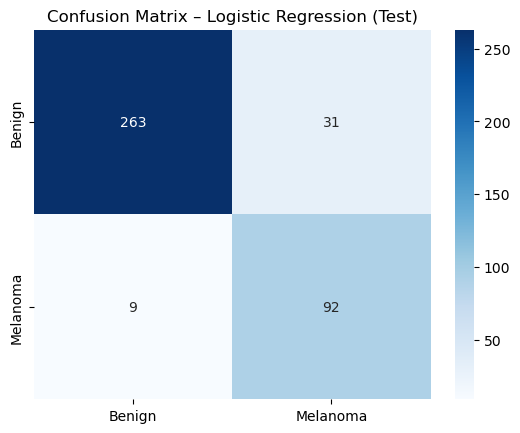

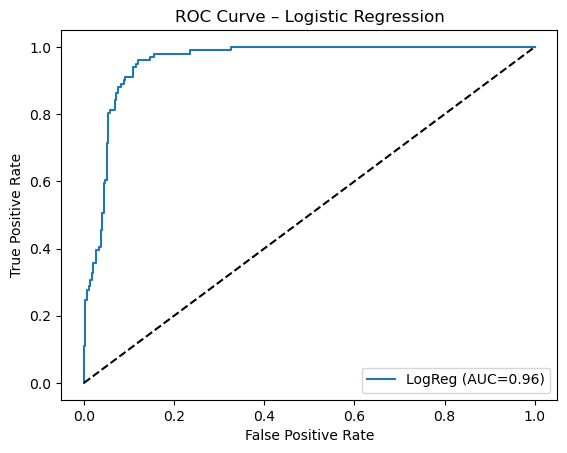

In [19]:
log_reg = LogisticRegression(max_iter=500, class_weight="balanced", solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train_bin)

y_pred_test = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print_metrics(y_test_bin, y_pred_test, "Test")

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Melanoma"], yticklabels=["Benign","Melanoma"])
plt.title("Confusion Matrix – Logistic Regression (Test)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_prob_lr)
auc = roc_auc_score(y_test_bin, y_prob_lr)
plt.plot(fpr, tpr, label=f"LogReg (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend(); plt.show()


In [20]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train_bin)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

print_metrics(y_test_bin, y_pred_knn, "Test")



Test Metrics:
Accuracy : 0.8911392405063291
Precision: 0.8085106382978723
Recall   : 0.7524752475247525
F1 Score : 0.7794871794871795



Test Metrics:
Accuracy : 0.7139240506329114
Precision: 0.4714285714285714
Recall   : 0.9801980198019802
F1 Score : 0.6366559485530546


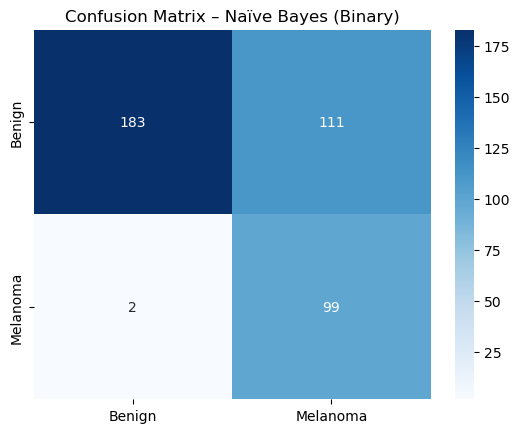

In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train_bin)

y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:,1]

print_metrics(y_test_bin, y_pred_nb, "Test")

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Melanoma"], yticklabels=["Benign","Melanoma"])
plt.title("Confusion Matrix – Naïve Bayes (Binary)")
plt.show()



Naïve Bayes (Multiclass) Report:
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.21      0.82      0.34        11
           2       0.78      0.04      0.08       156
           3       0.00      0.00      0.00         5
           4       0.13      0.50      0.21         4
           5       0.16      0.62      0.26         8
           6       0.33      0.29      0.31         7
           7       0.64      0.58      0.61        12
           8       0.00      0.00      0.00         1
           9       0.23      0.50      0.32        18
          10       0.26      0.81      0.39        26
          11       0.00      0.00      0.00        40
          12       0.12      0.20      0.15        15
          13       0.00      0.00      0.00         1
          14       0.75      0.50      0.60         6
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00    

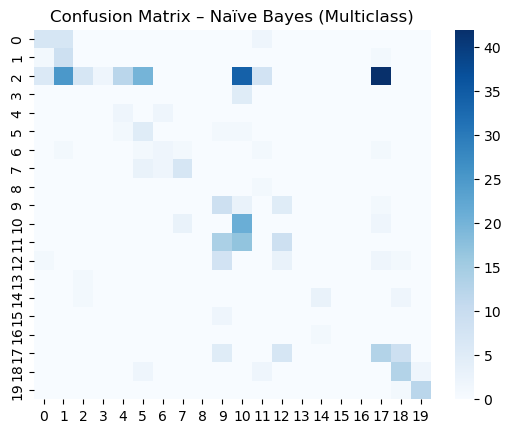

In [22]:
nb_multi = GaussianNB()
nb_multi.fit(X_train, y_train_multi.values.argmax(axis=1))
y_pred_nb_multi = nb_multi.predict(X_test)

print("\nNaïve Bayes (Multiclass) Report:")
print(classification_report(y_test_multi.values.argmax(axis=1), y_pred_nb_multi, zero_division=0))

cm = confusion_matrix(y_test_multi.values.argmax(axis=1), y_pred_nb_multi)
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix – Naïve Bayes (Multiclass)")
plt.show()


In [23]:
 ##dt_bin = DecisionTreeClassifier(max_depth=5, random_state=42)
##dt_bin.fit(X_train, y_train_bin)

##y_pred_dt_bin = dt_bin.predict(X_test)
##y_prob_dt_bin = dt_bin.predict_proba(X_test)[:,1]

##print_metrics(y_test_bin, y_pred_dt_bin, "Test")



Test Metrics:
Accuracy : 0.9974683544303797
Precision: 1.0
Recall   : 0.9900990099009901
F1 Score : 0.9950248756218906


In [24]:
results = {}
results["Logistic Regression"] = get_metrics(y_test_bin, y_pred_test, y_prob_lr)
results["kNN (k=5)"] = get_metrics(y_test_bin, y_pred_knn, y_prob_knn)
results["Naïve Bayes"] = get_metrics(y_test_bin, y_pred_nb, y_prob_nb)
results["Decision Tree"] = get_metrics(y_test_bin, y_pred_dt_bin, y_prob_dt_bin)

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.898734,0.747967,0.910891,0.821429,0.955715
kNN (k=5),0.891139,0.808511,0.752475,0.779487,0.941419
Naïve Bayes,0.713924,0.471429,0.980198,0.636656,0.801323
Decision Tree,0.997468,1.000000,0.990099,0.995025,0.995050


## Executive Summary – (Baseline Models)

- **Objective:**  
  Establish baseline performance for metadata‑only classification before extending to image‑based CNNs and multimodal fusion.  

- **Targets:**  
  - **Binary:** melanoma vs. benign (primary research focus)  
  - **Multiclass:** full diagnosis categories (secondary)  

- **Approach:**  
  - Loaded cleaned features and targets from Lab 2 (`features.csv`, `target_binary.csv`, `target_multiclass.csv`)  
  - Applied provided train/valid/test splits to ensure reproducibility  
  - Trained baseline models: **Logistic Regression, Decision Tree, k‑Nearest Neighbors (k=5), and Naïve Bayes**  
  - Evaluated models using **accuracy, precision, recall, F1‑score, ROC curves, AUC**, and confusion matrices  
  - Extended Naïve Bayes to the **multiclass setting** to benchmark performance across all diagnostic categories  

- **Why it matters:**  
  - Baselines provide a **transparent, interpretable reference point** against which more advanced models (MLPs, CNNs, multimodal fusion) can be compared  
  - They highlight trade‑offs between linear, tree‑based, instance‑based, and probabilistic approaches  
  - Establishing clear baseline metrics ensures that subsequent improvements from deep learning are **quantifiable and meaningful**  
